In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [82]:
sns.set_theme(style="darkgrid")

In [83]:
results = pd.read_csv('results.csv')

In [84]:
results.describe()

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,min_num_intervals
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000,9.973000e+03,9973.0
mean,207.630903,104.315452,6.049835,2.745853,-848.205767,5.491929e+05,-848.205768,4.745081e+06,1.0
std,2478.973171,1239.486586,2.587348,1.593657,12738.184448,2.778329e+06,12738.184230,3.377476e+07,0.0
min,3.000000,2.000000,2.000000,0.000880,-896513.582681,5.183400e+04,-896513.576236,2.866700e+04,1.0
25%,3.000000,2.000000,4.000000,1.346294,-89.280407,1.458750e+05,-89.280422,1.330830e+05,1.0
50%,7.000000,4.000000,6.000000,2.728838,-14.572645,2.770000e+05,-14.572645,3.280420e+05,1.0
75%,39.000000,20.000000,8.000000,4.127883,-5.543236,5.149580e+05,-5.543237,1.356458e+06,1.0
max,166769.000000,83385.000000,10.000000,5.499491,3.101507,1.947888e+08,3.101507,2.125666e+09,1.0


In [85]:
non_nan_results = (
    results
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
)
non_nan_results_melted = (
    non_nan_results.melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length', 'min_num_intervals', 'use_intervals', 'integrator', 'initialMatrixType'], var_name='type', value_name='value')
)
non_nan_durations = (
    non_nan_results
    .drop(columns=['bdmm_likelihood', 'flow_likelihood'])
    .melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length', 'min_num_intervals', 'use_intervals', 'integrator', 'initialMatrixType'], var_name='algorithm', value_name='duration')
)

In [86]:
non_nan_results["flow_duration"].mean()

549192.8641331595

In [87]:
len(results), len(non_nan_results)

(9973, 9973)

In [88]:
non_nan_results["bdmm_duration"].sum() / non_nan_results["flow_duration"].sum()

8.640100368661598

In [89]:
non_nan_results[non_nan_results["leaf_count"] > 100]["bdmm_duration"].sum() / non_nan_results[non_nan_results["leaf_count"] > 100]["flow_duration"].sum()

16.08701027802024

Text(0, 0.5, 'BDMM Log Likelihood')

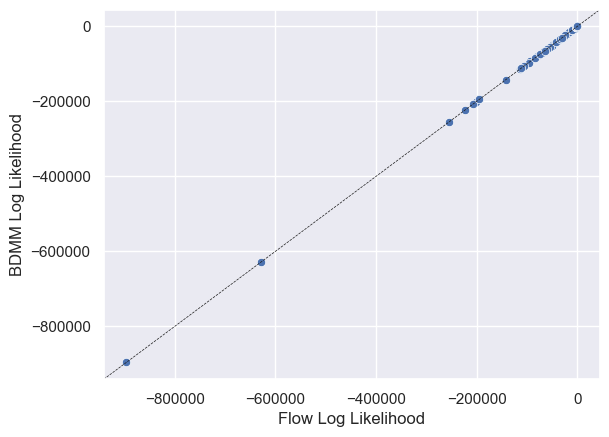

In [90]:
ax = sns.scatterplot(non_nan_results, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

Text(0, 0.5, 'Flow Duration (ns)')

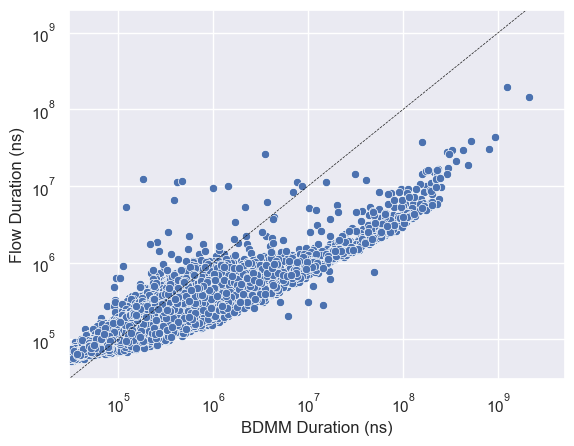

In [91]:
ax = sns.scatterplot(non_nan_results, x="bdmm_duration", y="flow_duration")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xscale('log')
plt.yscale('log')

plt.xlim(3e4, 5e9)
plt.ylim(3e4, 2e9)

plt.xlabel('BDMM Duration (ns)')
plt.ylabel('Flow Duration (ns)')


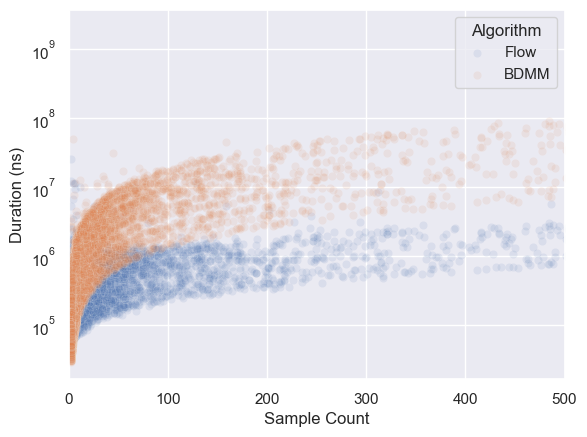

In [92]:
sns.scatterplot(non_nan_results, x="leaf_count", y="flow_duration", alpha=0.1)
sns.scatterplot(non_nan_results, x="leaf_count", y="bdmm_duration", alpha=0.1)

plt.yscale('log')

plt.xlim(0, 500)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

plt.legend(labels=["Flow", "BDMM"], title="Algorithm")

Text(0, 0.5, 'Duration (ns)')

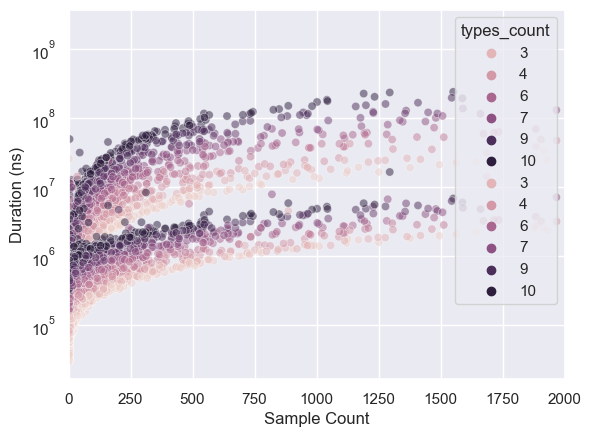

In [93]:
sns.scatterplot(non_nan_results, x="leaf_count", y="bdmm_duration", alpha=0.5, hue="types_count")
sns.scatterplot(non_nan_results, x="leaf_count", y="flow_duration", alpha=0.5, hue="types_count")

plt.yscale('log')

plt.xlim(0, 2000)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

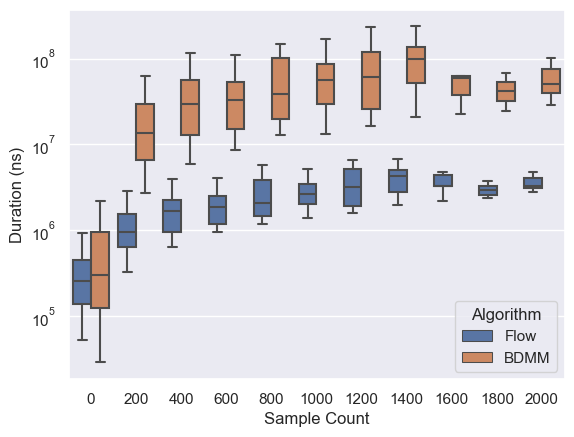

In [94]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="algorithm",
    showfliers=False
)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Flow", "BDMM"], title="Algorithm")

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

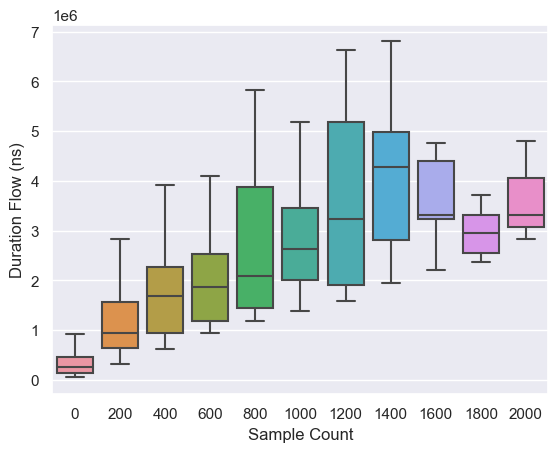

In [95]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[(results["binned_leaves"] < 2200)], 
    x="binned_leaves", y="flow_duration",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration BDMM (ns)')

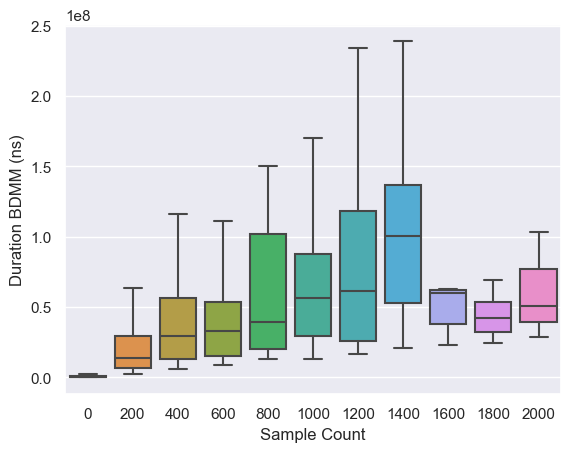

In [96]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[(results["binned_leaves"] < 2200)], 
    x="binned_leaves", y="bdmm_duration",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration BDMM (ns)')

Text(0, 0.5, 'Duration (ns)')

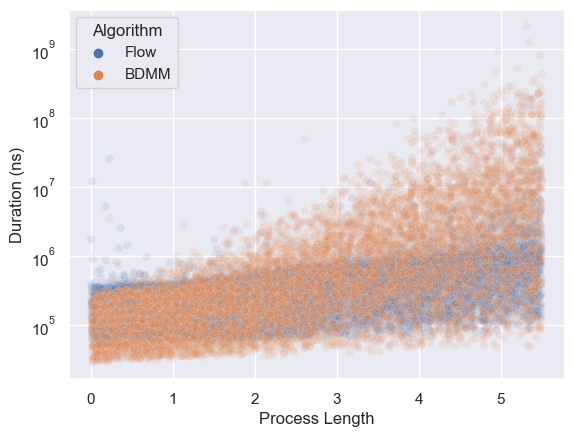

In [97]:
ax = sns.scatterplot(
    non_nan_durations, 
    x="process_length", y="duration", hue="algorithm",
    alpha=0.1
)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Flow", "BDMM"], title="Algorithm")

plt.yscale('log')

plt.xlabel('Process Length')
plt.ylabel('Duration (ns)')

In [98]:
results.sort_values("node_count", ascending=False).head(10)

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,use_intervals,min_num_intervals,integrator,initialMatrixType,binned_leaves
9576,166769,83385,4,5.312851,-896513.582681,143296792,-896513.576236,2125666167,False,1,DormandPrince54Integrator,RANDOM,83200
3888,117407,58704,3,5.337523,-629258.926346,194788791,-629258.893946,1241874875,False,1,DormandPrince54Integrator,RANDOM,58600
4773,52549,26275,3,5.197704,-254530.284775,38554208,-254530.279994,519058166,False,1,DormandPrince54Integrator,RANDOM,26200
6087,44267,22134,5,4.965755,-223251.946235,44086916,-223251.948699,923794709,False,1,DormandPrince54Integrator,RANDOM,22000
1919,43795,21898,2,5.382827,-206414.828628,29496834,-206414.826175,322861917,False,1,DormandPrince54Integrator,RANDOM,21800
288,43171,21586,2,5.140528,-200511.703200,27824291,-200511.706109,286085791,False,1,DormandPrince54Integrator,RANDOM,21400
7536,42373,21187,2,4.799567,-194523.344582,25807042,-194523.343254,303221458,False,1,DormandPrince54Integrator,RANDOM,21000
3501,28445,14223,4,5.416591,-141832.193631,21425000,-141832.193551,363572125,False,1,DormandPrince54Integrator,RANDOM,14200
4713,26213,13107,2,4.928877,-113003.760045,15741417,-113003.759135,173615833,False,1,DormandPrince54Integrator,RANDOM,13000
8901,24007,12004,3,5.455109,-111986.674258,15928208,-111986.673000,225004208,False,1,DormandPrince54Integrator,RANDOM,12000


Text(0, 0.5, 'Duration Flow (ns)')

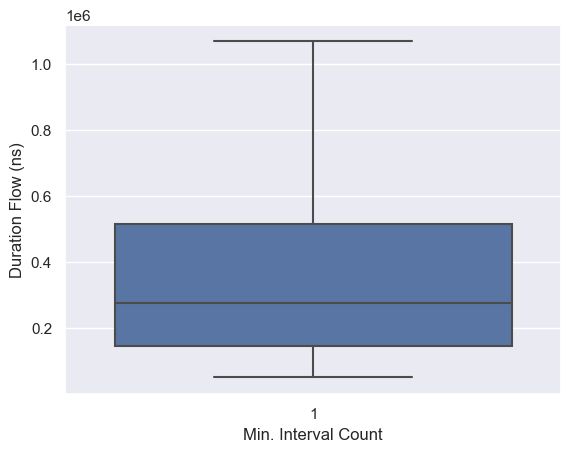

In [99]:
ax = sns.boxplot(
    results, 
    x="min_num_intervals", y="flow_duration",
    showfliers=False
)

plt.xlabel('Min. Interval Count')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

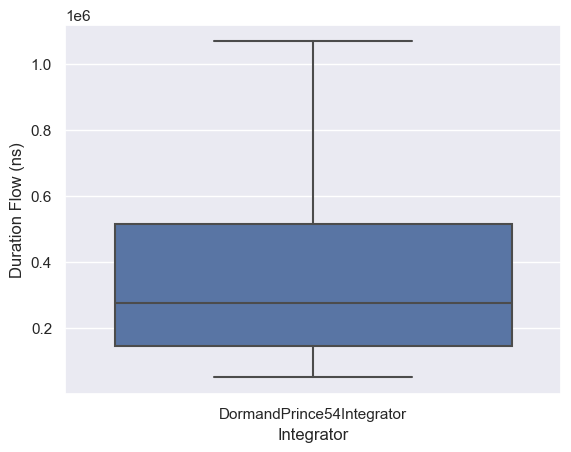

In [100]:
ax = sns.boxplot(
    results, 
    x="integrator", y="flow_duration",
    showfliers=False
)

plt.xlabel('Integrator')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

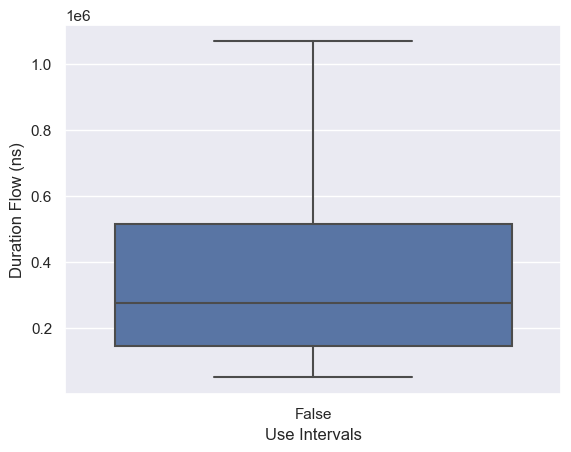

In [101]:
ax = sns.boxplot(
    results, 
    x="use_intervals", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Intervals')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration (ns)')

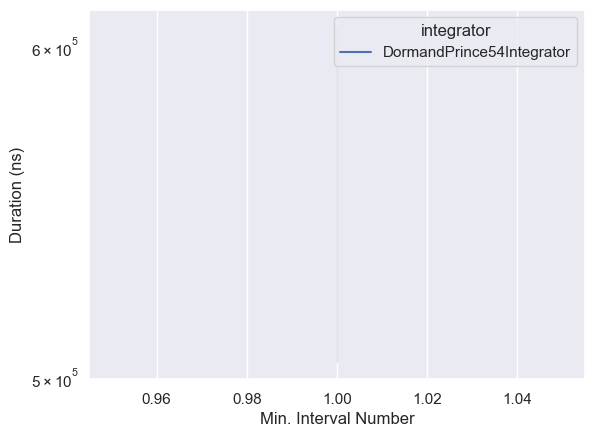

In [102]:
sns.lineplot(non_nan_results, x="min_num_intervals", y="flow_duration", alpha=1.0, hue="integrator")

plt.yscale('log')

plt.xlabel('Min. Interval Number')
plt.ylabel('Duration (ns)')

In [103]:
ax = sns.boxplot(
    results[results["use_intervals"]], 
    x="useRandomInitial", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Random Initial')
plt.ylabel('Duration Flow (ns)')

ValueError: Could not interpret input 'useRandomInitial'

In [ ]:
ax = sns.boxplot(
    results[~results["use_intervals"]], 
    x="useRandomInitial", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Random Initial')
plt.ylabel('Duration Flow (ns)')

ValueError: min() arg is an empty sequence

Text(0, 0.5, 'Duration (ns)')

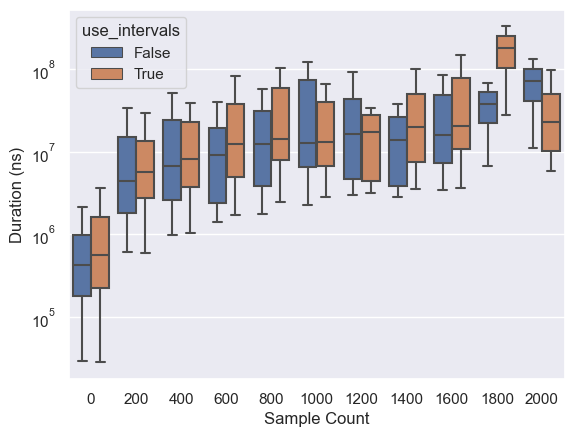

In [ ]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="use_intervals",
    showfliers=False
)

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

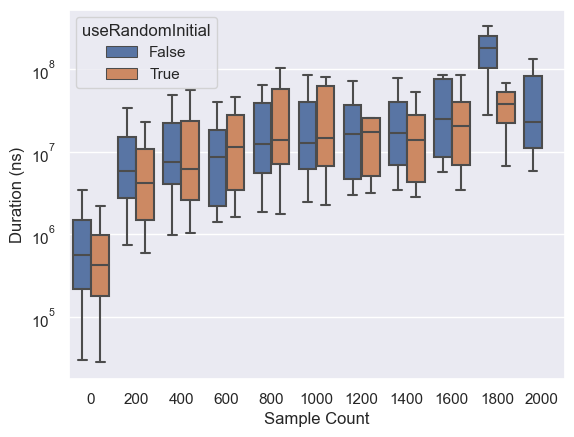

In [ ]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="useRandomInitial",
    showfliers=False
)

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')